In [83]:
# Import Important Libraries
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn import preprocessing # preprocessing is what we do with the data before we run the learning algorithm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The data is loaded from csv file and loaded into x_train, y_train, x_test, y_test. The split used for training and test data was already provided. The train to test data ratio is 70:30

In [92]:
# loading data 
df_data = pd.read_csv('data.csv',delim_whitespace=False)
class_mapping={label:idx for idx,label in enumerate(np.unique(df_data['class']))} # change the class names which are strings to integers
df_data['class']=df_data['class'].map(class_mapping)
y = np.array(df_data['class'])
#getting features from the data and saving them into different vectors
X = df_data.drop(columns="class")
#only saving the values
x_train_raw, x_test_raw, y_train, y_test = train_test_split(X, y,test_size=0.3)
x_train_raw = x_train_raw.values 
x_test_raw = x_test_raw.values
print(x_train_raw.shape)
print(x_test_raw.shape)

#getting the raw data y_train and y_test
print(y_train.shape)
print(y_test.shape)

(366, 27)
(157, 27)
(366,)
(157,)


Three different methods of preprocessing (scaler, normalize and standard scalar) were used to compare their level of accuracy against one another. They are run through the same models. 

In [93]:
#Preprocessing data for Logistic Regression. 
#Standard Scaler
scaler = StandardScaler()
xst_train = scaler.fit(x_train_raw)
xst_test = scaler.fit(x_test_raw)
xst_train = scaler.transform(x_train_raw)
xst_test = scaler.transform(x_test_raw)

#Normalize
xn_train = preprocessing.normalize(x_train_raw)
xn_test = preprocessing.normalize(x_test_raw)

#Scaler
xsc_train = preprocessing.scale(x_train_raw)
xsc_test = preprocessing.scale(x_test_raw)

Using sklearn library to create a logistic regression model using lbfgs solver with l2 panelty. 

In [94]:
def logreg_lbfgs(x_tr,y_tr,x_ts,y_ts,c):
    logreg = LogisticRegression(solver='lbfgs',multi_class='multinomial',dual=False, tol=0.0001, C=c, max_iter=7000,fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
    #Fitting the model 
    model_fit=logreg.fit(x_tr,y_tr)

    #predict
    yhat1 = model_fit.predict(x_tr)
    yhat2 = model_fit.predict(x_ts)
    
    #different accuracy tests
    prec_ts,recall_ts,f1_ts,_= precision_recall_fscore_support(y_ts,yhat2, average='weighted')
    prec_tr,recall_tr,f1_tr,_= precision_recall_fscore_support(y_tr,yhat1, average='weighted')
    
    # Below are some other types of accuracy but f1 score was chosen in our case. 
    # acc_score = accuracy_score(y_tr, yhat1, normalize=True)
    # fit_score = model_fit.score(x_tr,y_tr)
    return f1_ts, f1_tr

In [95]:
#using a for loop and calling logreg with different values of c. 
cp = [ 0.5, 1, 2, 5, 8, 10, 12] 
f1tr_1_sc = []
f1ts_1_sc = []
f1tr_1_n = []
f1ts_1_n = []
f1tr_1_st = []
f1ts_1_st = []

for c in cp:
   
    f1ts_1sc,f1tr_1sc = logreg_lbfgs(xsc_train,y_train,xsc_test,y_test,c)
    f1ts_1n,f1tr_1n = logreg_lbfgs(xn_train,y_train,xn_test,y_test,c)
    f1ts_1st,f1tr_1st = logreg_lbfgs(xst_train,y_train,xst_test,y_test,c)
    
    
    f1tr_1_sc.append(f1tr_1sc)
    f1ts_1_sc.append(f1ts_1sc)
    f1tr_1_st.append(f1tr_1n)
    f1ts_1_st.append(f1ts_1n)
    f1tr_1_n.append(f1tr_1st)
    f1ts_1_n.append(f1ts_1st)
    

Plot F1 score vs c graph for scalar, normalized and standard scaler data for the logistic regression model with l2 panelty

0.9048161268556004
0.8924167406151197
0.8924167406151197


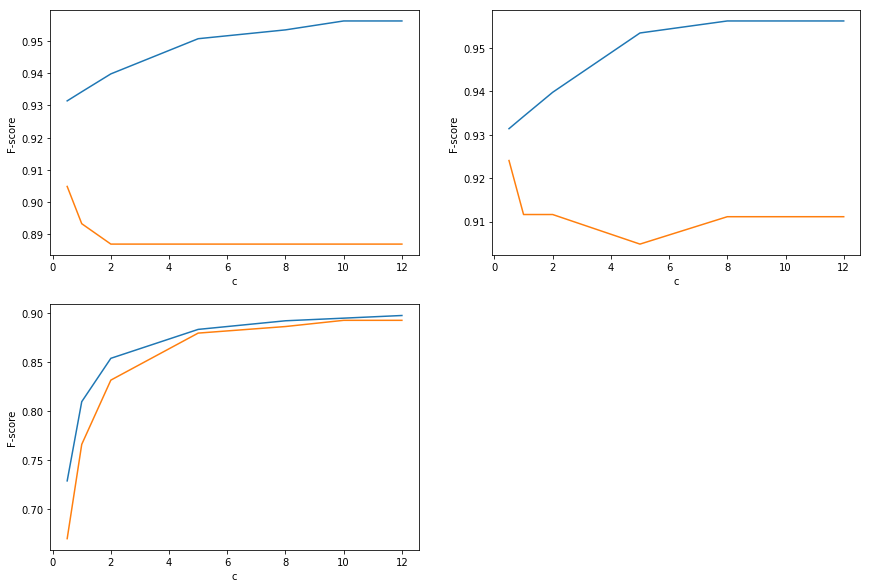

In [96]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr_1_sc)
plt.plot(cp,f1ts_1_sc)
print(max(f1ts_1_sc))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr_1_n)
plt.plot(cp,f1ts_1_n)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_1_st))

plt.subplot(2,2,3)
plt.plot(cp,f1tr_1_st)
plt.plot(cp,f1ts_1_st)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_1_st))

Using sklearn library to create a logistic regression model using saga solver with l2 panelty.

In [97]:
#Creating logistical regression models using saga solver (l2 panelty) 
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
def logreg_saga(x_tr,y_tr,x_ts,y_ts,c):
    logreg_saga = LogisticRegression(penalty='l2',solver='saga',multi_class='multinomial',max_iter=7000,dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
    #Fitting the model 
    model_fit=logreg_saga.fit(x_tr,y_tr)

    #predict
    yhat1 = model_fit.predict(x_tr)
    yhat2 = model_fit.predict(x_ts)
   
    #different accuracy tests

    prec_ts,recall_ts,f1_ts,_= precision_recall_fscore_support(y_ts,yhat2, average='weighted')
    prec_tr,recall_tr,f1_tr,_= precision_recall_fscore_support(y_tr,yhat1, average='weighted')
    acc_score = accuracy_score(y_tr, yhat1, normalize=True)
    fit_score = model_fit.score(x_tr,y_tr)
    return f1_ts, f1_tr

<Figure size 432x288 with 0 Axes>

In [98]:
#using a for loop and calling logreg with different values of c. 
cp = [ 0.5, 1, 2, 5, 8, 10, 12] 
f1tr_2_sc = []
f1ts_2_sc = []
f1tr_2_n = []
f1ts_2_n = []
f1tr_2_st = []
f1ts_2_st = []

for c in cp:
   
    f1ts_2sc,f1tr_2sc = logreg_saga(xsc_train,y_train,xsc_test,y_test,c)
    f1ts_2n,f1tr_2n = logreg_saga(xn_train,y_train,xn_test,y_test,c)
    f1ts_2st,f1tr_2st = logreg_saga(xst_train,y_train,xst_test,y_test,c)
    
    
    f1tr_2_sc.append(f1tr_2sc)
    f1ts_2_sc.append(f1ts_2sc)
    f1tr_2_st.append(f1tr_2n)
    f1ts_2_st.append(f1ts_2n)
    f1tr_2_n.append(f1tr_2st)
    f1ts_2_n.append(f1ts_2st)
    

Plot F1 score vs c graph for scalar, normalized and standard scaler data for the logistic regression model with saga solver and l2 panelty

0.9048161268556004
0.8924167406151197
0.8924167406151197


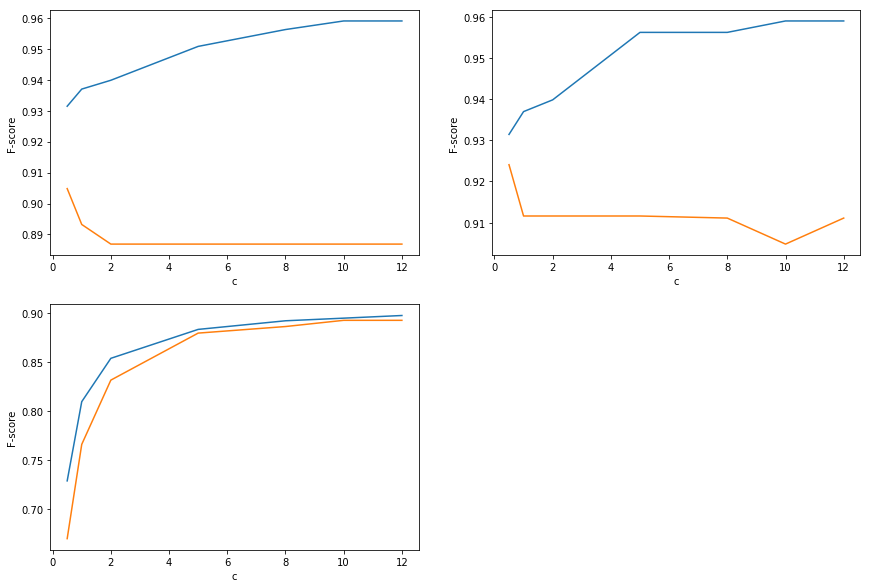

In [99]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr_2_sc)
plt.plot(cp,f1ts_2_sc)
print(max(f1ts_2_sc))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr_2_n)
plt.plot(cp,f1ts_2_n)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_2_st))

plt.subplot(2,2,3)
plt.plot(cp,f1tr_2_st)
plt.plot(cp,f1ts_2_st)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_2_st))

Using sklearn library to create a logistic regression model using saga solver with l1 panelty.

In [102]:
#Creating logistical regression models using saga solver (l1 panelty) 
def logreg_saga2(x_tr,y_tr,x_ts,y_ts,c):
    logreg_saga2 = LogisticRegression(penalty='l1',solver='saga',max_iter=7000,multi_class='multinomial',dual=False, tol=0.0001, C=c, fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
    #Fitting the model 
    model_fit=logreg_saga2.fit(x_tr,y_tr)
    #predict
    yhat1 = model_fit.predict(x_tr)
    yhat2 = model_fit.predict(x_ts)
    #accuracy 
    prec_ts,recall_ts,f1_ts,_= precision_recall_fscore_support(y_ts,yhat2, average='weighted')
    prec_tr,recall_tr,f1_tr,_= precision_recall_fscore_support(y_tr,yhat1, average='weighted')
    acc_score = accuracy_score(y_tr, yhat1, normalize=True)
    fit_score = model_fit.score(x_tr,y_tr)
    return f1_ts, f1_tr

In [103]:
#using a for loop and calling logreg with different values of c. 
#using a for loop and calling logreg with different values of c. 
cp = [ 0.5, 1, 2, 5, 8, 10, 12] 
f1tr_3_sc = []
f1ts_3_sc = []
f1tr_3_n = []
f1ts_3_n = []
f1tr_3_st = []
f1ts_3_st = []

for c in cp:
   
    f1ts_3sc,f1tr_3sc = logreg_saga2(xsc_train,y_train,xsc_test,y_test,c)
    f1ts_3n,f1tr_3n = logreg_saga2(xn_train,y_train,xn_test,y_test,c)
    f1ts_3st,f1tr_3st = logreg_saga2(xst_train,y_train,xst_test,y_test,c)
    
    
    f1tr_3_sc.append(f1tr_3sc)
    f1ts_3_sc.append(f1ts_3sc)
    f1tr_3_st.append(f1tr_3n)
    f1ts_3_st.append(f1ts_3n)
    f1tr_3_n.append(f1tr_3st)
    f1ts_3_n.append(f1ts_3st)
    

Plot F1 score vs c graph for scalar, normalized and standard scaler data for the logistic regression model with saga solver and l1 panelty

0.9113830179191519
0.9177327935222671
0.9177327935222671


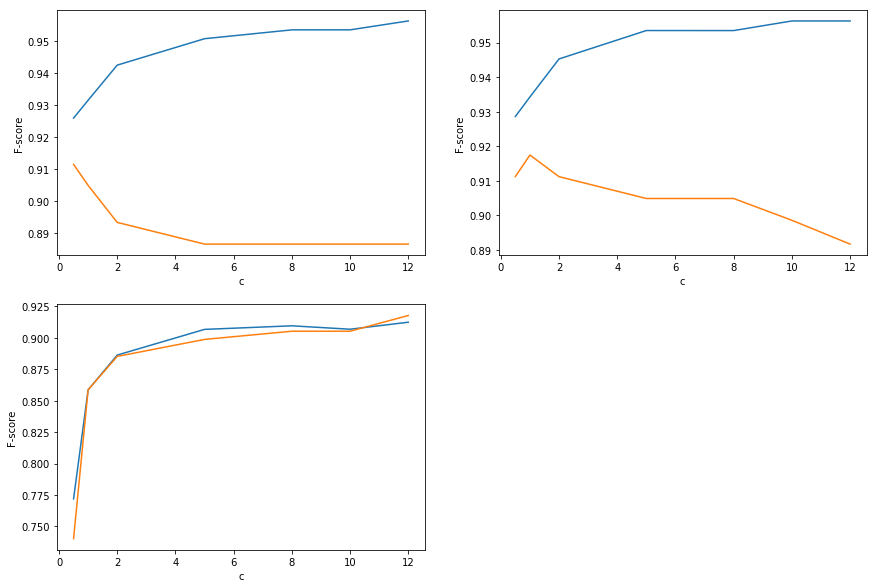

In [104]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr_3_sc)
plt.plot(cp,f1ts_3_sc)
print(max(f1ts_3_sc))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr_3_n)
plt.plot(cp,f1ts_3_n)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_3_st))

plt.subplot(2,2,3)
plt.plot(cp,f1tr_3_st)
plt.plot(cp,f1ts_3_st)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts_3_st))

Cross Validation on data that was Scaler

In [58]:
# #Cross Validation # Scaler Preprocessing of the data 
# def cross_valsc(x_train,y_train,nfold):
#     from sklearn.model_selection import KFold
#     from sklearn.metrics import confusion_matrix
#     kf = KFold(n_splits=nfold)
#     conf_sum1 = 0;
#     conf_sum2 = 0;
#     conf_sum3 = 0;
#     f11 = []
#     f12 = []
#     f13= []

#     for train, test in kf.split(xsc_train):            
#     # Get training and test data
#         Xtr = xsc_train[train,:]
#         ytr = y_train[train]
#         Xts = xsc_train[test,:]
#         yts = y_train[test]

#         # Fit a model
        
#         logreg_main1 = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=3, fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
#         logreg_main2 = LogisticRegression(penalty='l2',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=3, fit_intercept=True, intercept_scaling=1) #saga handles l2 penalty (ridge regularization)
#         logreg_main3 = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=3, fit_intercept=True, intercept_scaling=1) #saga handles l1 penalty (lasso regularization)
#         #Fitting the model 
#         logreg_main1.fit(Xtr, ytr)
#         logreg_main2.fit(Xtr, ytr)
#         logreg_main3.fit(Xtr, ytr)
#         yhat1 = logreg_main1.predict(Xts)
#         yhat2 = logreg_main2.predict(Xts)
#         yhat3 = logreg_main3.predict(Xts)

#         # Measuring performance
#         conf1 = confusion_matrix(yts,yhat1)
#         conf_sum1 = np.add (conf1,conf_sum1)
#         prec_11,recall_11,f1_11,_= precision_recall_fscore_support(yts,yhat1) 
#         f11.append(f1_11)
    
#         conf2 = confusion_matrix(yts,yhat2)
#         conf_sum2 = np.add (conf2,conf_sum2)
#         prec_12,recall_12,f1_12,_= precision_recall_fscore_support(yts,yhat2) 
#         f12.append(f1_12)
        
#         conf3 = confusion_matrix(yts,yhat3)
#         conf_sum3 = np.add (conf3,conf_sum3)
#         prec_13,recall_13,f1_13,_= precision_recall_fscore_support(yts,yhat3) 
#         f13.append(f1_13)
        

#     mean_f12 = np.mean(f12)
#     mean_f11 = np.mean(f11)
#     mean_f13 = np.mean(f13)
#     print(conf_sum1)
#     print(conf_sum2)
#     print(conf_sum3)
#     return mean_f12,mean_f11, mean_f13

In [59]:
# mean_f12,mean_f11,mean_f13=cross_valsc(xsc_train,y_train,7)
# print(mean_f11)
# print(mean_f12)
# print(mean_f13)

# #NOTE: THIS WARNING CAN BE REMOVED BY CHANGING THE NUMBER OF ITERATIONS. HOWEVER, MORE NUMBER OF MAX ITERATIONS DECREASE 
# #EFFICIENCY. 

[[ 93   1   8   9]
 [  0  44   0  10]
 [  8   0  47   3]
 [  3   4   0 136]]
[[ 93   1   8   9]
 [  0  44   0  10]
 [  8   0  47   3]
 [  3   4   0 136]]
[[ 95   0   7   9]
 [  0  47   0   7]
 [  9   0  47   2]
 [  3   5   0 135]]
0.8629642261475057
0.8629642261475057
0.8773011912512351


Cross Validaiton on Data that was normalized

In [60]:
# #Cross Validation #Normalized Preprocessing of the data 
# def cross_valn(x_train,y_train,nfold):
#     from sklearn.model_selection import KFold
#     from sklearn.metrics import confusion_matrix
#     kf = KFold(n_splits=nfold)
#     conf_sum1 = 0;
#     conf_sum2 = 0;
#     conf_sum3 = 0;
#     f11 = []
#     f12 = []
#     f13= []

#     for train, test in kf.split(xsc_train):            
#     # Get training and test data
#         Xtr = xn_train[train,:]
#         ytr = y_train[train]
#         Xts = xn_train[test,:]
#         yts = y_train[test]

#         # Fit a model
        
#         logreg_main1 = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=2, fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
#         logreg_main2 = LogisticRegression(penalty='l2',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=2, fit_intercept=True, intercept_scaling=1) #saga handles l2 penalty (ridge regularization)
#         logreg_main3 = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=2, fit_intercept=True, intercept_scaling=1) #saga handles l1 penalty (lasso regularization)
#         #Fitting the model 
#         logreg_main1.fit(Xtr, ytr)
#         logreg_main2.fit(Xtr, ytr)
#         logreg_main3.fit(Xtr, ytr)
#         yhat1 = logreg_main1.predict(Xts)
#         yhat2 = logreg_main2.predict(Xts)
#         yhat3 = logreg_main3.predict(Xts)

#         # Measuring performance
#         conf1 = confusion_matrix(yts,yhat1)
#         conf_sum1 = np.add (conf1,conf_sum1)
#         prec_11,recall_11,f1_11,_= precision_recall_fscore_support(yts,yhat1) 
#         f11.append(f1_11)
    
#         conf2 = confusion_matrix(yts,yhat2)
#         conf_sum2 = np.add (conf2,conf_sum2)
#         prec_12,recall_12,f1_12,_= precision_recall_fscore_support(yts,yhat2)
#         f12.append(f1_12)
        
#         conf3 = confusion_matrix(yts,yhat3)
#         conf_sum3 = np.add (conf3,conf_sum3)
#         prec_13,recall_13,f1_13,_= precision_recall_fscore_support(yts,yhat3) 
#         f13.append(f1_13)
        
#     mean_f12 = np.mean(f12)
#     mean_f11 = np.mean(f11)
#     mean_f13 = np.mean(f13)
#     print(conf_sum1)
#     print(conf_sum2)
#     print(conf_sum3)
#     return mean_f12,mean_f11, mean_f13

In [61]:
# mean_f12,mean_f11,mean_f13=cross_valn(xn_train,y_train,7)
# print(mean_f11)
# print(mean_f12)
# print(mean_f13)
# 
# #NOTE: THIS WARNING CAN BE REMOVED BY CHANGING THE NUMBER OF ITERATIONS. HOWEVER, MORE NUMBER OF MAX ITERATIONS DECREASE 
# #EFFICIENCY. 

[[ 87   1   3  20]
 [  0  36   0  18]
 [ 17   0  36   5]
 [  3   4   0 136]]
[[ 87   1   3  20]
 [  0  36   0  18]
 [ 17   0  36   5]
 [  3   4   0 136]]
[[ 94   1   4  12]
 [  0  47   0   7]
 [ 14   1  42   1]
 [  4   4   0 135]]
0.7873246827951706
0.7873246827951706
0.8584416847106234


Cross Validation on scaler standard data

In [62]:
# #Cross Validation # Scaler Preprocessing of the data 
# def cross_valst(x_train,y_train,nfold):
#     from sklearn.model_selection import KFold
#     from sklearn.metrics import confusion_matrix
#     kf = KFold(n_splits=nfold)
#     conf_sum1 = 0;
#     conf_sum2 = 0;
#     conf_sum3 = 0;
#     f11 = []
#     f12 = []
#     f13= []

#     for train, test in kf.split(xsc_train):            
#     # Get training and test data
#         Xtr = xst_train[train,:]
#         ytr = y_train[train]
#         Xts = xst_train[test,:]
#         yts = y_train[test]

#         # Fit a model
        
#         logreg_main1 = LogisticRegression(penalty='l2',solver='lbfgs',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=10, fit_intercept=True, intercept_scaling=1) #lbfgs handles l2 penalty (ridge regularization)
#         logreg_main2 = LogisticRegression(penalty='l2',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=70, fit_intercept=True, intercept_scaling=1) #saga handles l2 penalty (ridge regularization)
#         logreg_main3 = LogisticRegression(penalty='l1',solver='saga',multi_class='multinomial',dual=False, tol=0.0001,max_iter=7000, C=60, fit_intercept=True, intercept_scaling=1) #saga handles l1 penalty (lasso regularization)
#         #Fitting the model 
#         logreg_main1.fit(Xtr, ytr)
#         logreg_main2.fit(Xtr, ytr)
#         logreg_main3.fit(Xtr, ytr)
#         yhat1 = logreg_main1.predict(Xts)
#         yhat2 = logreg_main2.predict(Xts)
#         yhat3 = logreg_main3.predict(Xts)

#         # Measuring performance
#         conf1 = confusion_matrix(yts,yhat1)
#         conf_sum1 = np.add (conf1,conf_sum1)
#         prec_11,recall_11,f1_11,_= precision_recall_fscore_support(yts,yhat1) 
#         f11.append(f1_11)
    
#         conf2 = confusion_matrix(yts,yhat2)
#         conf_sum2 = np.add (conf2,conf_sum2)
#         prec_12,recall_12,f1_12,_= precision_recall_fscore_support(yts,yhat2) 
#         f12.append(f1_12)
        
#         conf3 = confusion_matrix(yts,yhat3)
#         conf_sum3 = np.add (conf3,conf_sum3)
#         prec_13,recall_13,f1_13,_= precision_recall_fscore_support(yts,yhat3) 
#         f13.append(f1_13)
        
#     mean_f12 = np.mean(f12)
#     mean_f11 = np.mean(f11)
#     mean_f13 = np.mean(f13)
#     print(conf_sum1)
#     print(conf_sum2)
#     print(conf_sum3)
#     return mean_f12,mean_f11, mean_f13

In [63]:
# mean_f12,mean_f11,mean_f13=cross_valst(xst_train,y_train,7)
# print(mean_f11)
# print(mean_f12)
# print(mean_f13)

# #NOTE: THIS WARNING CAN BE REMOVED BY CHANGING THE NUMBER OF ITERATIONS. HOWEVER, MORE NUMBER OF MAX ITERATIONS DECREASE 
# #EFFICIENCY.

[[ 94   0   8   9]
 [  0  45   0   9]
 [ 10   0  46   2]
 [  4   6   0 133]]
[[ 95   0   8   8]
 [  0  44   0  10]
 [ 10   0  46   2]
 [  5   7   0 131]]
[[ 94   0   8   9]
 [  0  43   0  11]
 [ 10   0  46   2]
 [  5   7   0 131]]
0.8551948898621905
0.8487694643645234
0.8425791899785412


In [105]:
poly = PolynomialFeatures(degree=2) #ADAPTED FROM HOMEWORK 5
xsc_transformed_train = poly.fit_transform(xsc_train)
xsc_transformed_test = poly.fit_transform(xsc_test)
xn_transformed_train = poly.fit_transform(xn_train)
xn_transformed_test = poly.fit_transform(xn_test)
xst_transformed_train = poly.fit_transform(xst_train)
xst_transformed_test = poly.fit_transform(xst_test)


Finding the test and training accuracy using polynomial features preprocessing on scalar data 

In [ ]:
f1ts1 = []
f1ts2= []
f1ts3 = []
f1tr1 = []
f1tr2 = []
f1tr3 = []

for c in cp:
    f1_ts1, f1_tr1 = logreg_lbfgs(xsc_transformed_train,y_train,xsc_transformed_test,y_test,c)
    f1_ts2, f1_tr2= logreg_saga(xsc_transformed_train,y_train,xsc_transformed_test,y_test,c)
    f1_ts3, f1_tr3 = logreg_saga2(xsc_transformed_train,y_train,xsc_transformed_test,y_test,c)

    f1ts1.append(f1_ts1)
    f1ts2.append(f1_ts2)
    f1ts3.append(f1_ts3)
    f1tr1.append(f1_tr1)
    f1tr2.append(f1_tr2)
    f1tr3.append(f1_tr3)



In [ ]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr1)
plt.plot(cp,f1ts1)
print(max(f1ts1))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr2)
plt.plot(cp,f1ts2)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts2))

plt.subplot(2,2,3)
plt.plot(cp,f1tr3)
plt.plot(cp,f1ts3)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts3))

Finding the test and training accuracy using polynomial features preprocessing on normalize data 

In [ ]:
f1ts1 = []
f1ts2= []
f1ts3 = []

for c in cp:
    f1_ts1, f1_tr1 = logreg_lbfgs(xn_transformed_train,y_train,xn_transformed_test,y_test,c)
    f1_ts2, f1_tr2= logreg_saga(xn_transformed_train,y_train,xn_transformed_test,y_test,c)
    f1_ts3, f1_tr3 = logreg_saga2(xn_transformed_train,y_train,xn_transformed_test,y_test,c)

    f1ts1.append(f1_ts1)
    f1ts2.append(f1_ts2)
    f1ts3.append(f1_ts3)


In [ ]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr1)
plt.plot(cp,f1ts1)
print(max(f1ts1))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr2)
plt.plot(cp,f1ts2)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts2))

plt.subplot(2,2,3)
plt.plot(cp,f1tr3)
plt.plot(cp,f1ts3)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts3))

Finding the test and training accuracy using polynomial features preprocessing on standard scaler data

In [ ]:
f1ts1 = []
f1ts2= []
f1ts3 = []

for c in cp:
    f1_ts1, f1_tr1 = logreg_lbfgs(xst_transformed_train,y_train,xst_transformed_test,y_test,c)
    f1_ts2, f1_tr2= logreg_saga(xst_transformed_train,y_train,xst_transformed_test,y_test,c)
    f1_ts3, f1_tr3 = logreg_saga2(xst_transformed_train,y_train,xst_transformed_test,y_test,c)

    f1ts1.append(f1_ts1)
    f1ts2.append(f1_ts2)
    f1ts3.append(f1_ts3)



In [ ]:
plt.subplots_adjust(right=2, top=2, wspace=None, hspace=None)
plt.subplot(2,2,1)
plt.plot(cp,f1tr1)
plt.plot(cp,f1ts1)
print(max(f1ts1))
plt.xlabel("c")
plt.ylabel("F-score")

plt.subplot(2,2,2)
plt.plot(cp,f1tr2)
plt.plot(cp,f1ts2)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts2))

plt.subplot(2,2,3)
plt.plot(cp,f1tr3)
plt.plot(cp,f1ts3)
plt.xlabel("c")
plt.ylabel("F-score")
print(max(f1ts3))